In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import json

from modules.interfaces import User, DataBase
from modules.managers import PretradeDataManager, OrderManager, PortfolioManager
from modules.portfolio import *
from modules.tools import *

In [3]:
ac_info = read_json("config/mt5_account.json")["ftmo-demo"]
pre_db_info = read_json("config/postgres_info.json")["pre-trade"]
post_db_info = read_json("config/postgres_info.json")["post-trade"]
params = read_json("config/parameters.json")
asset_allocation = read_json("config/asset_allocation.json")

In [4]:
user = User().login_by_dict(ac_info)
pre_db = DataBase().connect_by_dict(pre_db_info)
post_db = DataBase().connect_by_dict(post_db_info)

Logged in as 1520198341 (FTMO-Demo2)
Connected to pre-trade (localhost:5432)
Connected to post-trade (localhost:5432)


In [5]:
pdm = PretradeDataManager(user, pre_db)
om = OrderManager(user, post_db)
pm = PortfolioManager(om, pdm, asset_allocation, params)

In [6]:
df = pdm.get_universe()

In [8]:
temp = df.loc[df.asset_class=='forex'].sort_values('spread')

In [11]:
temp

,id,symbol,asset_class,currency_base,currency_margin,currency_profit,description,digits,point,spread,trade_contract_size,trade_tick_size,trade_tick_value
38,2027,EURUSD,forex,EUR,EUR,USD,Euro vs United States Dollar,5,0.00001,2,100000,0.00001,1.000000
28,2017,AUDUSD,forex,AUD,AUD,USD,Australian Dollar vs US Dollar,5,0.00001,3,100000,0.00001,1.000000
27,2016,AUDNZD,forex,AUD,AUD,NZD,Australian Dollar vs New Zealand Dollar,5,0.00001,3,100000,0.00001,0.603120
48,2037,NZDUSD,forex,NZD,NZD,USD,New Zealand Dollar vs US Dollar,5,0.00001,5,100000,0.00001,1.000000
35,2024,EURGBP,forex,EUR,EUR,GBP,Euro vs Great Britain Pound,5,0.00001,5,100000,0.00001,1.259040
44,2033,GBPUSD,forex,GBP,GBP,USD,Great Britain Pound vs US Dollar,5,0.00001,6,100000,0.00001,1.000000
49,2038,USDCAD,forex,USD,USD,CAD,US Dollar vs Canadian Dollar,5,0.00001,7,100000,0.00001,0.731914
50,2039,USDCHF,forex,USD,USD,CHF,US Dollar vs Swiss Franc,5,0.00001,7,100000,0.00001,1.105950
34,2023,EURCHF,forex,EUR,EUR,CHF,Euro vs Swiss Franc,5,0.00001,8,100000,0.00001,1.105950
25,2014,AUDCHF,forex,AUD,AUD,CHF,Australian Dollar vs Swiss Franc,5,0.00001,9,100000,0.00001,1.105950


In [21]:
d = dict()
for i, r in temp.iterrows():
    # print(r)
    rate_name = r.currency_profit + "USD"

    if rate_name == "USDUSD":
        d[r.symbol] = rate_name
    elif rate_name in temp.symbol.to_list():
        ans = input("y:" + rate_name)
        if ans != "":
            rate_name = ans
        d[r.symbol] = rate_name
    else:
        rate_name = rate_name[3:] + rate_name[:3]
        ans = input("n:" + rate_name)
        if ans != "":
            rate_name = ans
        d[r.symbol] = rate_name

In [22]:
print(d)

{'EURUSD': 'USDUSD', 'AUDUSD': 'USDUSD', 'AUDNZD': 'NZDUSD', 'NZDUSD': 'USDUSD', 'EURGBP': 'GBPUSD', 'GBPUSD': 'USDUSD', 'USDCAD': 'USDCAD', 'USDCHF': 'USDCHF', 'EURCHF': 'USDCHF', 'AUDCHF': 'USDCHF', 'AUDCAD': 'USDCAD', 'EURAUD': 'AUDUSD', 'AUDJPY': 'USDJPY', 'USDJPY': 'USDJPY', 'NZDCAD': 'USDCAD', 'NZDCHF': 'USDCHF', 'NZDJPY': 'USDJPY', 'EURNZD': 'NZDUSD', 'GBPNZD': 'NZDUSD', 'CADCHF': 'USDCHF', 'GBPCHF': 'USDCHF', 'EURCAD': 'USDCAD', 'EURJPY': 'USDJPY', 'USDILS': 'USDILS', 'GBPAUD': 'AUDUSD', 'CADJPY': 'USDJPY', 'GBPCAD': 'USDCAD', 'GBPJPY': 'USDJPY', 'CHFJPY': 'USDJPY', 'USDHKD': 'USDHKD', 'EURCZK': 'USDCZK', 'USDCZK': 'USDCZK', 'EURPLN': 'USDPLN', 'USDPLN': 'USDPLN', 'USDHUF': 'USDHUF', 'USDSEK': 'USDSEK', 'EURNOK': 'USDNOK', 'USDNOK': 'USDNOK', 'USDMXN': 'USDMXN', 'USDZAR': 'USDZAR'}


In [24]:
print(list(d.keys()))

['EURUSD', 'AUDUSD', 'AUDNZD', 'NZDUSD', 'EURGBP', 'GBPUSD', 'USDCAD', 'USDCHF', 'EURCHF', 'AUDCHF', 'AUDCAD', 'EURAUD', 'AUDJPY', 'USDJPY', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'EURNZD', 'GBPNZD', 'CADCHF', 'GBPCHF', 'EURCAD', 'EURJPY', 'USDILS', 'GBPAUD', 'CADJPY', 'GBPCAD', 'GBPJPY', 'CHFJPY', 'USDHKD', 'EURCZK', 'USDCZK', 'EURPLN', 'USDPLN', 'USDHUF', 'USDSEK', 'EURNOK', 'USDNOK', 'USDMXN', 'USDZAR']


In [26]:
for k in d.keys():
  print(f'from .{k.lower()} import {k}')

from .eurusd import EURUSD
from .audusd import AUDUSD
from .audnzd import AUDNZD
from .nzdusd import NZDUSD
from .eurgbp import EURGBP
from .gbpusd import GBPUSD
from .usdcad import USDCAD
from .usdchf import USDCHF
from .eurchf import EURCHF
from .audchf import AUDCHF
from .audcad import AUDCAD
from .euraud import EURAUD
from .audjpy import AUDJPY
from .usdjpy import USDJPY
from .nzdcad import NZDCAD
from .nzdchf import NZDCHF
from .nzdjpy import NZDJPY
from .eurnzd import EURNZD
from .gbpnzd import GBPNZD
from .cadchf import CADCHF
from .gbpchf import GBPCHF
from .eurcad import EURCAD
from .eurjpy import EURJPY
from .usdils import USDILS
from .gbpaud import GBPAUD
from .cadjpy import CADJPY
from .gbpcad import GBPCAD
from .gbpjpy import GBPJPY
from .chfjpy import CHFJPY
from .usdhkd import USDHKD
from .eurczk import EURCZK
from .usdczk import USDCZK
from .eurpln import EURPLN
from .usdpln import USDPLN
from .usdhuf import USDHUF
from .usdsek import USDSEK
from .eurnok import EURNOK
f

In [24]:
symbol1 = 'AUDUSD'
symbol2 = 'NZDUSD'

concat_close = pd.DataFrame({'0':pdm.get_bars(symbol1).close,
                             '1':pdm.get_bars(symbol2).close}).dropna()

In [25]:
uni = pdm.get_universe()
point = uni.set_index("symbol").point
concat_cost = pd.DataFrame(
    {
        "0": pdm.get_bars(symbol1).spread
        * point[symbol1]
        / pdm.get_bars(symbol1).close,
        "1": pdm.get_bars(symbol2).spread
        * point[symbol2]
        / pdm.get_bars(symbol1).close,
    }
).dropna()

In [107]:
start, end = 0, len(concat_close) - 1
idx = concat_close.index

train_size = 6000  # ~1 year
step_size = 120

r2_l = list()
signal_l = list()
comb_pos_l = list()

from sklearn.linear_model import RidgeCV

while True:
    # start ----- (train_size-1) days -----> end
    start_train = idx[start]
    end_train = idx[start + train_size - 1]

    # end+1 ----- (step-1) days -----------> end test
    start_test = idx[start + train_size - train_size]
    end_test = idx[min(start + train_size + step_size - 1, end)]

    org_train_set = concat_close.loc[:end_train]
    train_set = org_train_set.apply(lambda s: get_ewsamples(s, period=train_size))
    test_set = concat_close.loc[start_test:end_test]

    org_train_y, org_train_x = org_train_set["0"], org_train_set[["1"]]
    train_y, train_x = train_set["0"], train_set[["1"]]
    test_y, test_x = test_set["0"], test_set[["1"]]

    # print(f"Train ---- {start_train} : {end_train}")
    model = RidgeCV(cv=5, fit_intercept=False)
    model.fit(train_x, train_y)
    # print(f"    R2 = {model.score(train_x,train_y)}")

    # print(f"Test  ---- {start_test} : {end_test}")
    # print(f"    R2 = {model.score(test_x,test_y)}")
    # print(model.intercept_, model.coef_)

    r2 = model.score(train_x, train_y)
    r2_l.append(r2)
    if True:
        # mean_abs_err = (
        #    (train_y - pd.Series(model.predict(train_x), index=train_x.index))
        #    .abs()
        #    .mean()
        # )
        # var_y = train_y.std() ** 2
        # var_u = (1 - r2) * var_y
        # std_u = var_u**0.5

        h = model.coef_[0]
        pair_value = test_y - h * test_x["1"]
        exp_value = model.intercept_
        # exp_value = pair_value.ewm(train_size, min_periods=train_size + 1).mean()
        # std_u = pair_value.ewm(train_size, min_periods=train_size + 1).std()

        # signal = ((pair_value - exp_value) / std_u).dropna()
        signal = (pair_value - exp_value).dropna()
        signal = signal / signal.abs().expanding().mean()
        signal_l.append(signal)

        # long_pos = pd.Series(np.where(signal <= -2, 1, 0), signal.index)
        # short_pos = pd.Series(np.where(signal >= 2, -1, 0), signal.index)
        # pos = long_pos + short_pos
        pos = -signal.clip(upper=2, lower=-2)

        comb_pos = pd.DataFrame({"0": 1 * pos, "1": -h * pos})
        comb_pos_l.append(comb_pos)
    else:
        signal_l.append(pd.Series(0, index=test_y.index))
        comb_pos_l.append(pd.DataFrame({"0": 0, "1": 0}, index=test_y.index))
        
    start += step_size
    if start + train_size >= end:
        break


In [108]:
pos = np.around(pd.concat(comb_pos_l) * 5) / 5
ew_pnl = (pos * np.log(concat_close).diff().shift(-1)).sum(axis=1)
costs = (pos.diff().abs() * concat_cost).sum(axis=1)

In [109]:
def sr(pnl):
  pnl = pnl.resample('d').sum()
  m = pnl.mean()*252
  s = pnl.std()*np.sqrt(252)
  sr = m/s
  return sr
def pf(pnl):
  pnl = pnl.resample('d').sum()
  g = pnl.clip(lower=0).sum()
  l = -pnl.clip(upper=0).sum()
  pf = g/l
  return pf

<Axes: xlabel='time'>

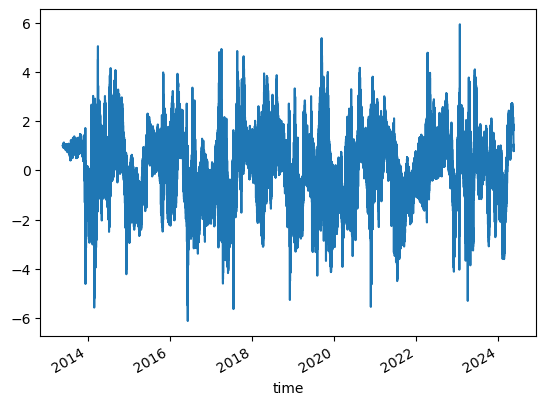

In [110]:
pd.concat(signal_l).plot()

In [111]:
print(sr(ew_pnl),pf(ew_pnl))
#print(sr(pnl),pf(pnl))

1.4751659475327756 1.4391185547701981


In [112]:
lev_factor = 0.2 / (ew_pnl.std() * np.sqrt(24 * 252))

<Axes: xlabel='time'>

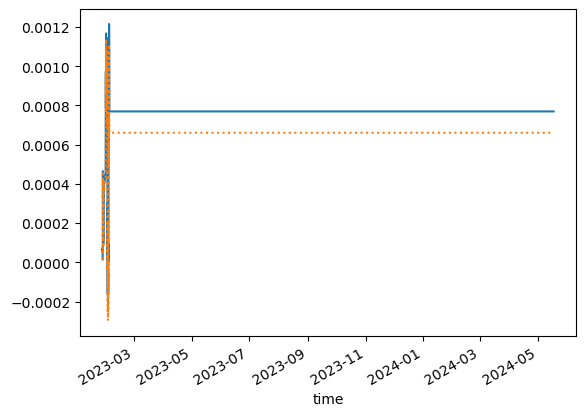

In [106]:
(ew_pnl / lev_factor).loc[start_test:].cumsum().plot()
((ew_pnl - costs) / lev_factor).loc[start_test:].cumsum().plot(linestyle=":")